Otimization via Stochastic Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

In [2]:
def loss(f, w, D):
    X, y = D
    return np.mean(np.square(f(w, X) - y))

def grad_loss(f, grad_f, w, D):
    X, y = D
    return np.mean(2 * grad_f(w, X).T * (f(w, X) - y))

In [3]:
def SGD(l, grad_l, w0, D, batch_size, n_epochs):
    learning_rate=1e-2
    X, y = D
    d, N = X.shape
    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)
    n_batch_per_epoch = N // batch_size
    w_val = [w0]
    f_val = [l(w0, Xhat, y)]
    grads = [grad_l(w0, Xhat, y)]
    err = [np.linalg.norm(grad_l(w0, Xhat, y), 2)]

    # Iterate over the epochs
    for epoch in range(n_epochs):
        idx = np.arange(N)
        np.random.shuffle(idx)
        # Batch iteration
        for k in range(n_batch_per_epoch):
            X_temp = Xhat[:, idx[k * batch_size : (k+1) * batch_size]]
            y_temp = y[idx[k * batch_size : (k+1) * batch_size]]

            # Batch set
            B = (X_temp, y_temp)

            # Gradient descent update
            w = w0 - learning_rate * grad_l(w0, B[0], B[1])
            w_val.append(w)
            w0 = w

        # Update the loss_vec
        # It would be better to use D instead of B, but it can cause problems with the gradient
        f_val.append(l(w, Xhat, y))
        grads.append(grad_l(w, Xhat, y))
        err.append(np.linalg.norm(grad_l(w, Xhat, y)))

    return w, f_val, grads, err

In [16]:
def GD(l, grad_l, w0, D, tolf = 1e-9, tolx= 1e-9, kmax = 100, alpha = 1e-3):
    X, Y = D
    d, N = X.shape

    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)
    
    w_vals = [w0]
    f_vals = [l(w0, Xhat, Y)]
    grad_f_vals = [grad_l(w0, Xhat, Y)]
    err_vals = [np.linalg.norm(grad_l(w0, Xhat, Y))]

    iterations = 0

    while iterations < kmax:
        w = w_vals[-1] - alpha * grad_l(w_vals[-1], Xhat, Y)

        w_vals.append(w)
        f_vals.append(l(w, Xhat, Y))
        grad_f_vals.append(grad_l(w, Xhat, Y))
        err_vals.append(np.linalg.norm(grad_l(w, Xhat, Y)))

        iterations+=1

        if err_vals[-1] < tolf * err_vals[0]:
            break

        if np.linalg.norm(w_vals[-1] - w_vals[-2]) < tolx * np.linalg.norm(w_vals[0]):
            break

    return (w, iterations, f_vals, grad_f_vals, err_vals)

# Digits 3 and 4, training size 2/3

In [5]:
data = scipy.io.loadmat('MNIST.mat')
X = data['X']
y = data['I']

print(X.shape, y.shape)

(256, 1707) (1, 1707)


In [6]:
X = np.array(X)
y = np.array(y)
y = np.reshape(y, (1707, ))
print(y)
print(X.shape, y.shape)

[6 5 4 ... 7 9 8]
(256, 1707) (1707,)


In [7]:
chosen_digits = [3, 4]
idx = (y[:] == chosen_digits[0]) | (y[:] == chosen_digits[1])
X_set = X[:, idx]
y_set = y[idx]
print(X_set.shape, y_set.shape)

(256, 253) (253,)


In [8]:
def train_test_split(X, Y, N_train):
    d, N = X.shape
    
    idx = np.arange(0, N)
    np.random.shuffle(idx)
    
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    
    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]
    
    return X_train, X_test, Y_train, Y_test    

In [9]:
d, N = X_set.shape
N_train = int(N/3 * 2)
y_set[y_set == chosen_digits[0]] = 0
y_set[y_set == chosen_digits[1]] = 1

X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, N_train)

D = (X_train, y_train)

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def f(w, X):
    return sigmoid(X.T @ w)

def grad_f(w, X):
    return (sigmoid(X.T @ w) * (1 - sigmoid(X.T @ w)) * X.T)

def MSE(f_w_x, y):
    return np.linalg.norm((f_w_x - y))**2

def grad_MSE(grad_f_w_x, f_w_x, y):
    return grad_f_w_x.T * (f_w_x - y)

def ell(w, X, y):
    d, N = X.shape
    mse_sum = 0
    for i in range(0, N):
        mse_sum += MSE(f(w, X[:, i]), y[i])
    
    return mse_sum / N

def grad_ell(w, X, y):
    d, N = X.shape
    grad_mse_sum = 0
    for i in range(0, N):
        grad_mse_sum += grad_MSE(np.array(grad_f(w, X[:, i])), f(w, X[:, i]), y[i])

    return grad_mse_sum / N

In [18]:
d, N = X_train.shape
w0 = np.random.normal(0, 0.1, d+1)
batch_size = 15
n_epochs = 50
wSGD, f_valsSGD, gradSGDs, errSGD = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)
wGD, iterationsGD, f_valsGD, gradGDs, errGD = GD(ell, grad_ell, w0, D)

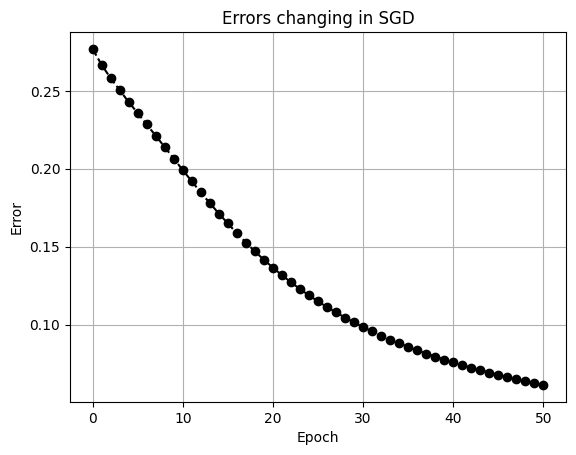

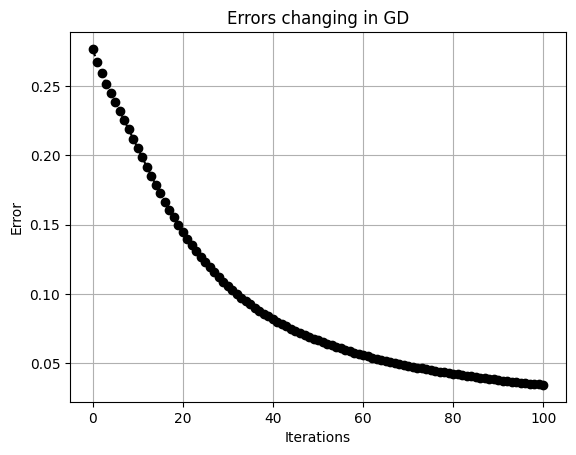

In [ ]:
x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, errSGD, 'ko--')
plt.title("Errors changing in SGD")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.grid()
plt.show()

x_plot = np.arange(len(errGD))
plt.plot(x_plot, errGD, 'ko--')
plt.title("Errors changing in GD")
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.grid()
plt.show()

In [ ]:
def acc(app, y, chosen_indeces):
    tot = 0
    for i in range(len(y)):
        if (int(app[i]) == y[i]):
            tot+=1
    return tot, tot/len(y)

def predict(w, X, threshold = 0.5):
    d, N = X.shape
    app = np.zeros(N)
    for i in range(N):
        result = f(w, X[:, i])
        if (result >= threshold):
            app[i] = 1
        else:
            app[i] = 0
    return app

In [ ]:
print('STOCHASTIC GRADIENT DESCENT')

Xt = X_train.copy()
yt = y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appSGDt = predict(wSGD, Xthat)
totSGDt, avgSGDt = acc(appSGDt, yt, chosen_digits)
print("     Matches on Train Set:", int(totSGDt))
print("     Total entries on Train Set:", int(yt.shape[0]))
print("     Accuracy on Train Set:", round(avgSGDt * 100, 2))

Xt = X_test.copy()
yt = y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appSGD = predict(wSGD, Xthat)
totSGD, avgSGD = acc(appSGD, yt, chosen_digits)
print("     Matches on Test Set:", int(totSGD))
print("     Total entries on Test Set:", int(yt.shape[0]))
print("     Accuracy on Test Set:", round(avgSGD * 100, 2))

print('\n')
print('GRADIENT DESCENT')

Xt = X_train.copy()
Yt = y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appGD = predict(wGD, Xthat)
totGD, avgGD = acc(appGD, Yt, chosen_digits)
print("     Matches on Train Set:", int(totGD))
print("     Total entries on Train Set:", int(Yt.shape[0]))
print("     Accuracy on Train Set:", round(avgGD * 100, 2))

Xt = X_test.copy()
Yt = y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appGD = predict(wGD, Xthat)
totGD, avgGD = acc(appGD, Yt, chosen_digits)
print("     Matches on Test Set:", int(totGD))
print("     Total entries on Test Set:", int(Yt.shape[0]))
print("     Accuracy on Test Set:", round(avgGD * 100, 2))

STOCHASTIC GRADIENT DESCENT
     Matches on Train Set: 166
     Total entries on Train Set: 168
     Accuracy on Train Set: 98.81
     Matches on Test Set: 85
     Total entries on Test Set: 85
     Accuracy on Test Set: 100.0


GRADIENT DESCENT
     Matches on Train Set: 167
     Total entries on Train Set: 168
     Accuracy on Train Set: 99.4
     Matches on Test Set: 85
     Total entries on Test Set: 85
     Accuracy on Test Set: 100.0


# Digits 0 and 8, training size 2/3

In [ ]:
X = data['X']
y = data['I']

X = np.array(X)
y = np.array(y)
y = np.reshape(y, (1707, ))

chosen_digits = [0, 8]
idx = (y[:] == chosen_digits[0]) | (y[:] == chosen_digits[1])
X_set = X[:, idx]
y_set = y[idx]
print(X_set.shape, y_set.shape)

d, N = X_set.shape
N_train = int(N/3 * 2)
y_set[y_set == chosen_digits[0]] = 0
y_set[y_set == chosen_digits[1]] = 1

X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, N_train)

D = (X_train, y_train)

d, N = X_train.shape
w0 = np.random.normal(0, 0.1, d+1)
batch_size = 15
n_epochs = 50
wSGD, f_valsSGD, gradSGDs, errSGD = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)
wGD, iterationsGD, f_valsGD, gradGDs, errGD = GD(ell, grad_ell, w0, D)

(256, 463) (463,)


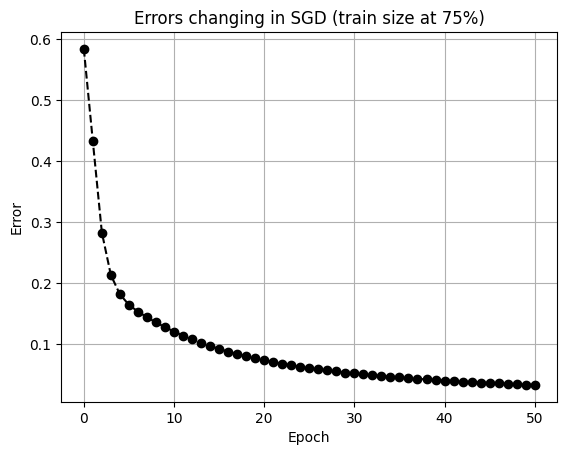

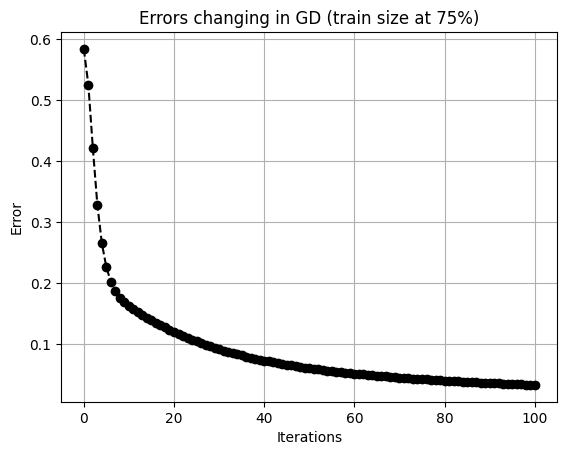

In [ ]:
x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, errSGD, 'ko--')
plt.title("Errors changing in SGD (train size at 75%)")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.grid()
plt.show()

x_plot = np.arange(len(errGD))
plt.plot(x_plot, errGD, 'ko--')
plt.title("Errors changing in GD (train size at 75%)")
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.grid()
plt.show()

In [ ]:
print('STOCHASTIC GRADIENT DESCENT')

Xt = X_train.copy()
yt = y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appSGDt = predict(wSGD, Xthat)
totSGDt, avgSGDt = acc(appSGDt, yt, chosen_digits)
print("     Matches on Train Set:", int(totSGDt))
print("     Total entries on Train Set:", int(yt.shape[0]))
print("     Accuracy on Train Set:", round(avgSGDt * 100, 2))

Xt = X_test.copy()
yt = y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appSGD = predict(wSGD, Xthat)
totSGD, avgSGD = acc(appSGD, yt, chosen_digits)
print("     Matches on Test Set:", int(totSGD))
print("     Total entries on Test Set:", int(yt.shape[0]))
print("     Accuracy on Test Set:", round(avgSGD * 100, 2))

print('\n')
print('GRADIENT DESCENT')

Xt = X_train.copy()
yt = y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appGD = predict(wGD, Xthat)
totGD, avgGD = acc(appGD, yt, chosen_digits)
print("     Matches on Train Set:", int(totGD))
print("     Total entries on Train Set:", int(yt.shape[0]))
print("     Accuracy on Train Set:", round(avgGD * 100, 2))

Xt = X_test.copy()
yt = y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appGD = predict(wGD, Xthat)
totGD, avgGD = acc(appGD, yt, chosen_digits)
print("     Matches on Test Set:", int(totGD))
print("     Total entries on Test Set:", int(yt.shape[0]))
print("     Accuracy on Test Set:", round(avgGD * 100, 2))

STOCHASTIC GRADIENT DESCENT
     Matches on Train Set: 303
     Total entries on Train Set: 308
     Accuracy on Train Set: 98.38
     Matches on Test Set: 149
     Total entries on Test Set: 155
     Accuracy on Test Set: 96.13


GRADIENT DESCENT
     Matches on Train Set: 303
     Total entries on Train Set: 308
     Accuracy on Train Set: 98.38
     Matches on Test Set: 149
     Total entries on Test Set: 155
     Accuracy on Test Set: 96.13


# Digits 3 and 4, training size at 75%

In [ ]:
X = data['X']
y = data['I']

X = np.array(X)
y = np.array(y)
y = np.reshape(y, (1707, ))

chosen_digits = [6, 9]
idx = (y[:] == chosen_digits[0]) | (y[:] == chosen_digits[1])
X_set = X[:, idx]
y_set = y[idx]
print(X_set.shape, y_set.shape)

d, N = X_set.shape
N_train = int(N/4 * 3)
y_set[y_set == chosen_digits[0]] = 0
y_set[y_set == chosen_digits[1]] = 1

X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, N_train)

D = (X_train, y_train)

d, N = X_train.shape
w0 = np.random.normal(0, 0.1, d+1)
batch_size = 15
n_epochs = 50
wSGD, f_valsSGD, gradSGDs, errSGD = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)
wGD, iterationsGD, f_valsGD, gradGDs, errGD = GD(ell, grad_ell, w0, D)

(256, 283) (283,)


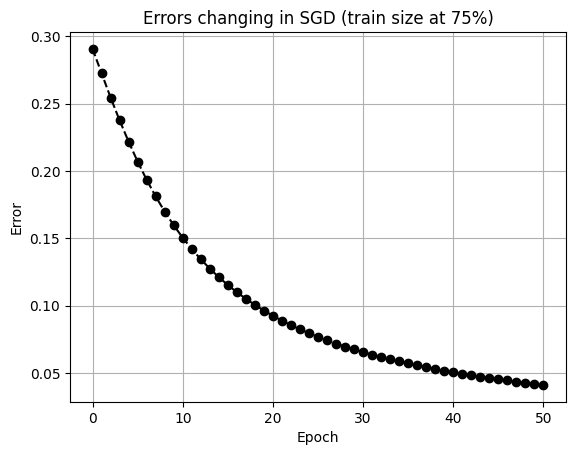

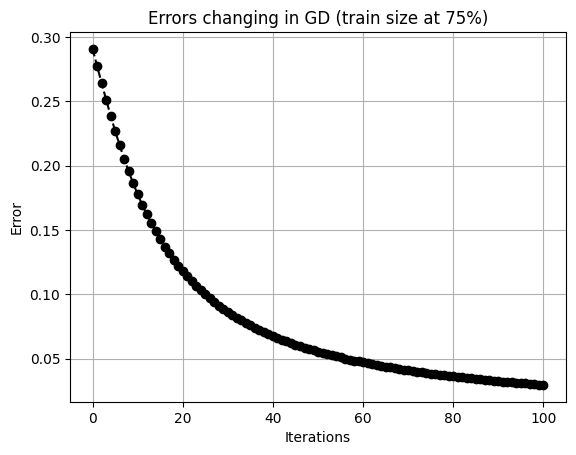

In [ ]:
x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, errSGD, 'ko--')
plt.title("Errors changing in SGD (train size at 75%)")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.grid()
plt.show()

x_plot = np.arange(len(errGD))
plt.plot(x_plot, errGD, 'ko--')
plt.title("Errors changing in GD (train size at 75%)")
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.grid()
plt.show()

In [ ]:
print('STOCHASTIC GRADIENT DESCENT')

Xt = X_train.copy()
yt = y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appSGDt = predict(wSGD, Xthat)
totSGDt, avgSGDt = acc(appSGDt, yt, chosen_digits)
print("     Matches on Train Set:", int(totSGDt))
print("     Total entries on Train Set:", int(yt.shape[0]))
print("     Accuracy on Train Set:", round(avgSGDt * 100, 2))

Xt = X_test.copy()
yt = y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appSGD = predict(wSGD, Xthat)
totSGD, avgSGD = acc(appSGD, yt, chosen_digits)
print("     Matches on Test Set:", int(totSGD))
print("     Total entries on Test Set:", int(yt.shape[0]))
print("     Accuracy on Test Set:", round(avgSGD * 100, 2))

print('\n')
print('GRADIENT DESCENT')

Xt = X_train.copy()
yt = y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appGD = predict(wGD, Xthat)
totGD, avgGD = acc(appGD, yt, chosen_digits)
print("     Matches on Train Set:", int(totGD))
print("     Total entries on Train Set:", int(yt.shape[0]))
print("     Accuracy on Train Set:", round(avgGD * 100, 2))

Xt = X_test.copy()
yt = y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
appGD = predict(wGD, Xthat)
totGD, avgGD = acc(appGD, yt, chosen_digits)
print("     Matches on Test Set:", int(totGD))
print("     Total entries on Test Set:", int(yt.shape[0]))
print("     Accuracy on Test Set:", round(avgGD * 100, 2))

STOCHASTIC GRADIENT DESCENT
     Matches on Train Set: 211
     Total entries on Train Set: 212
     Accuracy on Train Set: 99.53
     Matches on Test Set: 70
     Total entries on Test Set: 71
     Accuracy on Test Set: 98.59


GRADIENT DESCENT
     Matches on Train Set: 211
     Total entries on Train Set: 212
     Accuracy on Train Set: 99.53
     Matches on Test Set: 71
     Total entries on Test Set: 71
     Accuracy on Test Set: 100.0


## 3 digits: 1, 3 and 4

In [23]:
from sklearn.model_selection import train_test_split

X = data['X']
y = data['I']

X = np.array(X).T
y = np.array(y)
y = np.reshape(y, (1707, ))
print(X.shape, y.shape)

chosen_digits = [1, 3, 4]
idx = (y[:] == chosen_digits[0]) | (y[:] == chosen_digits[1]) | (y[:] == chosen_digits[2])
X_set = X[idx, :]
y_set = y[idx]
y_set[y_set == chosen_digits[0]] = 0
y_set[y_set == chosen_digits[1]] = 1
y_set[y_set == chosen_digits[2]] = 2

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2)

(1707, 256) (1707,)


In [24]:
def one_hot(y, c):
    return np.eye(c)[y]

def softmax(z):
    
    exp = np.exp(z - np.max(z))
    
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
        
    return exp

def SGD3(X, y, lr, c, epochs):
    
    m, n = X.shape
    
    w = np.random.random((n, c))
    b = np.random.random(c)
    losses = []
    
    for epoch in range(epochs):
        
        z = X @ w + b
        y_hat = softmax(z)
        
        y_hot = one_hot(y, c)
        
        w_grad = (1/m) * (X.T @ (y_hat - y_hot)) 
        b_grad = (1/m) * np.sum(y_hat - y_hot)
        
        w = w - lr * w_grad
        b = b - lr * b_grad
        
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        losses.append(loss)

    return w, b, losses

def predict3(X, w, b):
    
    z = X@w + b
    y_hat = softmax(z)
    return np.argmax(y_hat, axis=1)

def accuracy3(y, y_hat):
    return np.sum(y==y_hat)/len(y)

In [25]:
w, b, l = SGD3(X_train, y_train, lr=0.9, c=3, epochs=1000)

train_preds = predict3(X_train, w, b)
print('Accuracy on train set:', accuracy3(y_train, train_preds))

test_preds = predict3(X_test, w, b)
print('Accuracy on test set:', accuracy3(y_test, test_preds))

Accuracy on train set: 1.0
Accuracy on test set: 0.9900990099009901


## 3 digits: 0, 8 and 3

In [27]:
X = data['X']
y = data['I']

X = np.array(X).T
y = np.array(y)
y = np.reshape(y, (1707, ))

chosen_digits = [0, 8, 3]
idx = (y[:] == chosen_digits[0]) | (y[:] == chosen_digits[1]) | (y[:] == chosen_digits[2])
X_set = X[idx, :]
y_set = y[idx]
y_set[y_set == chosen_digits[0]] = 0
y_set[y_set == chosen_digits[1]] = 1
y_set[y_set == chosen_digits[2]] = 2

X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2)

w, b, l = SGD3(X_train, y_train, lr=0.9, c=3, epochs=1000)

train_preds = predict3(X_train, w, b)
print('Accuracy on train set:', accuracy3(y_train, train_preds))

test_preds = predict3(X_test, w, b)
print('Accuracy on test set:', accuracy3(y_test, test_preds))

Accuracy on train set: 1.0
Accuracy on test set: 0.957983193277311
